In [1]:
#Import libraries
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
#Import Dataset + Data Preprocessing
df_mitbih_train = pd.read_csv(r"C:\Users\calvi\Documents\Datasets\ecg_dataset\mitbih_train.csv", header=None)
df_mitbih_test = pd.read_csv(r"C:\Users\calvi\Documents\Datasets\ecg_dataset\mitbih_test.csv", header=None)

df_mitbih_train.shape, df_mitbih_test.shape

((87554, 188), (21892, 188))

In [3]:
df_mitbih_test[187].unique()

array([0., 1., 2., 3., 4.])

In [4]:
X_train = df_mitbih_train.drop(columns = [187])

In [5]:
X_train = df_mitbih_train.drop(columns=[187])
y_train = df_mitbih_train[187]
X_test = df_mitbih_test.drop(columns=[187])
y_test = df_mitbih_test[187]

In [6]:
y_train.shape

(87554,)

In [7]:
X_test.shape, X_train.shape, y_test.shape, y_test.shape

((21892, 187), (87554, 187), (21892,), (21892,))

In [8]:
#Test Model
model = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, objective = 'multi:softmax', n_jobs = -1)
model.fit(X_train, y_train)
print(); print(model)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)


In [9]:
expected_y  = y_test
predicted_y = model.predict(X_test)

print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     18118
         1.0       0.96      0.67      0.79       556
         2.0       0.97      0.92      0.95      1448
         3.0       0.87      0.73      0.79       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.96      0.86      0.90     21892
weighted avg       0.98      0.98      0.98     21892



In [31]:
param_grid = {
    "max_depth": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_cv = GridSearchCV(model, param_grid, n_jobs = 4, verbose = 3, return_train_score = True)
_ = grid_cv.fit(X_test, y_test)

print(f'Best Parameters:', grid_cv.best_params_)
print(f'Best Score:', grid_cv.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Parameters: {'max_depth': 9}
Best Score: 0.9729582225729324


In [32]:
param_grid = {
    "learning_rate": [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
}

grid_cv = GridSearchCV(model, param_grid, n_jobs = 4, verbose = 3, return_train_score = True)
_ = grid_cv.fit(X_test, y_test)

print(f'Best Parameters:', grid_cv.best_params_)
print(f'Best Score:', grid_cv.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Parameters: {'learning_rate': 0.5}
Best Score: 0.9728212467181347


In [33]:
param_grid = {   
    "gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
}

grid_cv = GridSearchCV(model, param_grid, n_jobs = 4, verbose = 3, return_train_score = True)
_ = grid_cv.fit(X_test, y_test)

print(f'Best Parameters:', grid_cv.best_params_)
print(f'Best Score:', grid_cv.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Parameters: {'gamma': 0}
Best Score: 0.9714966077872182


In [34]:
param_grid = {    
    "reg_lambda": [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
}

grid_cv = GridSearchCV(model, param_grid, n_jobs = 4, verbose = 3, return_train_score = True)
_ = grid_cv.fit(X_test, y_test)

print(f'Best Parameters:', grid_cv.best_params_)
print(f'Best Score:', grid_cv.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Parameters: {'reg_lambda': 0.8}
Best Score: 0.972227399531653


In [35]:
param_grid = {   
    "subsample": [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
}

grid_cv = GridSearchCV(model, param_grid, n_jobs = 4, verbose = 3, return_train_score = True)
_ = grid_cv.fit(X_test, y_test)

print(f'Best Parameters:', grid_cv.best_params_)
print(f'Best Score:', grid_cv.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Parameters: {'subsample': 0.8}
Best Score: 0.972547128092037


In [36]:
param_grid = {   
    "colsample_bytree": [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
}

grid_cv = GridSearchCV(model, param_grid, n_jobs = 4, verbose = 3, return_train_score = True)
_ = grid_cv.fit(X_test, y_test)

print(f'Best Parameters:', grid_cv.best_params_)
print(f'Best Score:', grid_cv.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Parameters: {'colsample_bytree': 0.8}
Best Score: 0.972318744587602


In [10]:
#This method of plotting ran into a memory allocaiton error but I can get the accuracy scores through a different method
max_depth = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_acc = []
test_acc = []

for rate in max_depth:
    model = XGBClassifier(max_depth=rate, tree_method='gpu_hist', gpu_id=0, objective = 'multi:softmax', n_jobs = -1)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    print('Parameter', rate, 'Completed')

plt.plot(max_depth, train_acc, label='Train Acc')
plt.plot(max_depth, test_acc, label = 'Test Acc')
plt.legend()
plt.show()
print('Train Acc:', train_acc)
print('Test Acc:', test_acc)

XGBoostError: [11:49:15] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:802: Exception in gpu_hist: [11:49:15] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\data\../common/device_helpers.cuh:431: Memory allocation error on worker 0: bad allocation: cudaErrorMemoryAllocation: out of memory
- Free memory: 1244974286
- Requested memory: 4294967296



From GridSearch Verbose

[CV 4/5] END ...max_depth=0;, score=(train=1.000, test=0.974) total time= 2.5min
[CV 1/5] END ...max_depth=0;, score=(train=1.000, test=0.973) total time= 2.6min
[CV 1/5] END ...max_depth=1;, score=(train=0.940, test=0.936) total time=  28.7s
[CV 2/5] END ...max_depth=1;, score=(train=0.940, test=0.934) total time=  28.0s
[CV 3/5] END ...max_depth=1;, score=(train=0.940, test=0.936) total time=  27.2s
[CV 3/5] END ...max_depth=0;, score=(train=1.000, test=0.973) total time= 4.1min
[CV 4/5] END ...max_depth=1;, score=(train=0.938, test=0.939) total time=  10.1s
[CV 5/5] END ...max_depth=1;, score=(train=0.940, test=0.938) total time=   7.7s
[CV 5/5] END ...max_depth=0;, score=(train=1.000, test=0.970) total time= 1.8min
[CV 1/5] END ...max_depth=2;, score=(train=0.971, test=0.960) total time=   7.9s
[CV 2/5] END ...max_depth=2;, score=(train=0.972, test=0.959) total time=   7.5s
[CV 3/5] END ...max_depth=2;, score=(train=0.972, test=0.963) total time=   7.4s
[CV 4/5] END ...max_depth=2;, score=(train=0.970, test=0.963) total time=   7.5s
[CV 5/5] END ...max_depth=2;, score=(train=0.972, test=0.958) total time=   7.5s
[CV 2/5] END ...max_depth=0;, score=(train=1.000, test=0.968) total time= 4.5min
[CV 1/5] END ...max_depth=3;, score=(train=0.987, test=0.967) total time=   8.7s
[CV 2/5] END ...max_depth=3;, score=(train=0.988, test=0.962) total time=   8.2s
[CV 3/5] END ...max_depth=3;, score=(train=0.989, test=0.968) total time=   8.0s
[CV 4/5] END ...max_depth=3;, score=(train=0.987, test=0.972) total time=   8.1s
[CV 5/5] END ...max_depth=3;, score=(train=0.987, test=0.966) total time=   8.2s
[CV 1/5] END ...max_depth=4;, score=(train=0.997, test=0.972) total time=  10.9s
[CV 2/5] END ...max_depth=4;, score=(train=0.997, test=0.966) total time=  11.0s
[CV 3/5] END ...max_depth=4;, score=(train=0.998, test=0.970) total time=  11.4s
[CV 4/5] END ...max_depth=4;, score=(train=0.998, test=0.973) total time=  11.5s
[CV 5/5] END ...max_depth=4;, score=(train=0.998, test=0.969) total time=  12.2s
[CV 1/5] END ...max_depth=5;, score=(train=1.000, test=0.973) total time=  14.9s
[CV 2/5] END ...max_depth=5;, score=(train=1.000, test=0.967) total time=  15.0s
[CV 3/5] END ...max_depth=5;, score=(train=1.000, test=0.972) total time=  15.1s
[CV 4/5] END ...max_depth=5;, score=(train=1.000, test=0.974) total time=  16.0s
[CV 5/5] END ...max_depth=5;, score=(train=1.000, test=0.969) total time=  16.3s
[CV 1/5] END ...max_depth=6;, score=(train=1.000, test=0.973) total time=  19.5s
[CV 2/5] END ...max_depth=6;, score=(train=1.000, test=0.966) total time=  19.6s
[CV 3/5] END ...max_depth=6;, score=(train=1.000, test=0.973) total time=  20.2s
[CV 4/5] END ...max_depth=6;, score=(train=1.000, test=0.974) total time=  20.6s
[CV 5/5] END ...max_depth=6;, score=(train=1.000, test=0.971) total time=  20.6s
[CV 1/5] END ...max_depth=7;, score=(train=1.000, test=0.974) total time=  23.1s
[CV 2/5] END ...max_depth=7;, score=(train=1.000, test=0.968) total time=  23.2s
[CV 3/5] END ...max_depth=7;, score=(train=1.000, test=0.974) total time=  23.3s
[CV 4/5] END ...max_depth=7;, score=(train=1.000, test=0.974) total time=  24.2s
[CV 5/5] END ...max_depth=7;, score=(train=1.000, test=0.970) total time=  24.0s
[CV 1/5] END ...max_depth=8;, score=(train=1.000, test=0.974) total time=  27.2s
[CV 2/5] END ...max_depth=8;, score=(train=1.000, test=0.967) total time=  26.9s
[CV 3/5] END ...max_depth=8;, score=(train=1.000, test=0.972) total time=  27.2s
[CV 4/5] END ...max_depth=8;, score=(train=1.000, test=0.975) total time=  27.6s
[CV 5/5] END ...max_depth=8;, score=(train=1.000, test=0.972) total time=  28.4s
[CV 1/5] END ...max_depth=9;, score=(train=1.000, test=0.975) total time=  31.7s
[CV 2/5] END ...max_depth=9;, score=(train=1.000, test=0.970) total time=  31.7s
[CV 3/5] END ...max_depth=9;, score=(train=1.000, test=0.973) total time=  31.8s
[CV 4/5] END ...max_depth=9;, score=(train=1.000, test=0.976) total time=  32.8s
[CV 5/5] END ...max_depth=9;, score=(train=1.000, test=0.971) total time=  32.5s
[CV 1/5] END ..max_depth=10;, score=(train=1.000, test=0.974) total time=  34.1s
[CV 2/5] END ..max_depth=10;, score=(train=1.000, test=0.969) total time=  34.0s
[CV 3/5] END ..max_depth=10;, score=(train=1.000, test=0.973) total time=  30.2s
[CV 4/5] END ..max_depth=10;, score=(train=1.000, test=0.976) total time=  26.3s
[CV 5/5] END ..max_depth=10;, score=(train=1.000, test=0.971) total time=  19.6s

Parameter 0 Completed
Parameter 0.1 Completed
Parameter 0.2 Completed
Parameter 0.3 Completed
Parameter 0.4 Completed
Parameter 0.5 Completed
Parameter 0.6 Completed
Parameter 0.7 Completed
Parameter 0.8 Completed
Parameter 0.9 Completed
Parameter 1 Completed


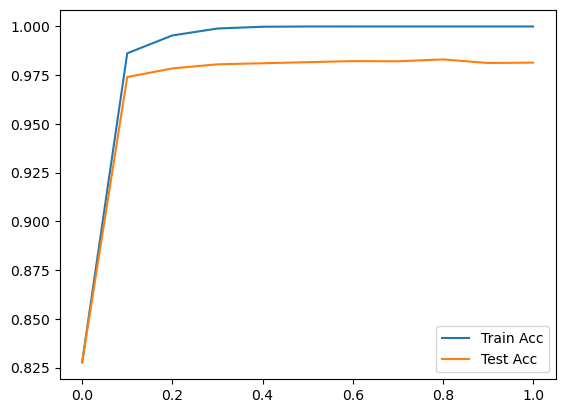

Train Acc: [0.8277291728533248, 0.9862484866482399, 0.9953971263448843, 0.9989492199099984, 0.9998629417273911, 0.9999885784772826, 1.0, 1.0, 1.0, 1.0, 1.0]
Test Acc: [0.8276082587246483, 0.9740544491138315, 0.9784852914306597, 0.980586515622145, 0.9811346610634022, 0.9816828065046592, 0.9822309519459164, 0.9821395943723734, 0.9830988488945733, 0.9812716974237164, 0.9814544125708021]


In [43]:
learning_rate = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
train_acc = []
test_acc = []

for rate in learning_rate:
    model = XGBClassifier(learning_rate=rate, tree_method='gpu_hist', gpu_id=0, objective = 'multi:softmax', n_jobs = -1)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    print('Parameter', rate, 'Completed')

plt.plot(learning_rate, train_acc, label='Train Acc')
plt.plot(learning_rate, test_acc, label = 'Test Acc')
plt.legend()
plt.show()
print('Train Acc:', train_acc)
print('Test Acc:', test_acc)

Parameter 0 Completed
Parameter 0.1 Completed
Parameter 0.2 Completed
Parameter 0.3 Completed
Parameter 0.4 Completed
Parameter 0.5 Completed
Parameter 0.6 Completed
Parameter 0.7 Completed
Parameter 0.8 Completed
Parameter 0.9 Completed
Parameter 1 Completed


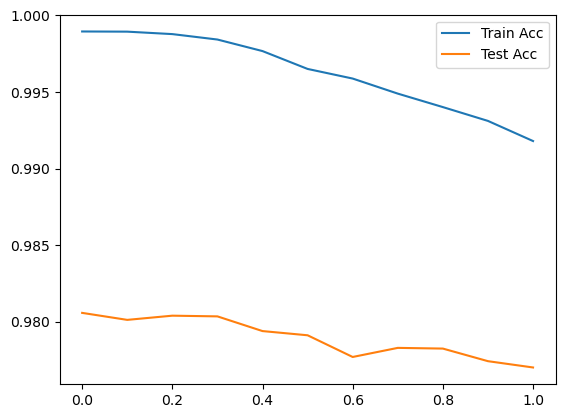

Train Acc: [0.9989492199099984, 0.998937798387281, 0.9987778970692373, 0.9984238298649976, 0.9976700093656486, 0.9965050140484729, 0.9958768302990154, 0.9948945793453183, 0.9940151220960779, 0.9931128218014026, 0.9917993466889006]
Test Acc: [0.980586515622145, 0.9801297277544309, 0.9804038004750594, 0.980358121688288, 0.979398867166088, 0.9791247944454595, 0.9777087520555454, 0.9783025762835739, 0.9782568974968024, 0.9774346793349169, 0.977023570253974]


In [45]:
gamma = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
train_acc = []
test_acc = []

for rate in gamma:
    model = XGBClassifier(gamma=rate, tree_method='gpu_hist', gpu_id=0, objective = 'multi:softmax', n_jobs = -1)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    print('Parameter', rate, 'Completed')

plt.plot(gamma, train_acc, label='Train Acc')
plt.plot(gamma, test_acc, label = 'Test Acc')
plt.legend()
plt.show()
print('Train Acc:', train_acc)
print('Test Acc:', test_acc)

Parameter 0 Completed
Parameter 0.1 Completed
Parameter 0.2 Completed
Parameter 0.3 Completed
Parameter 0.4 Completed
Parameter 0.5 Completed
Parameter 0.6 Completed
Parameter 0.7 Completed
Parameter 0.8 Completed
Parameter 0.9 Completed
Parameter 1 Completed


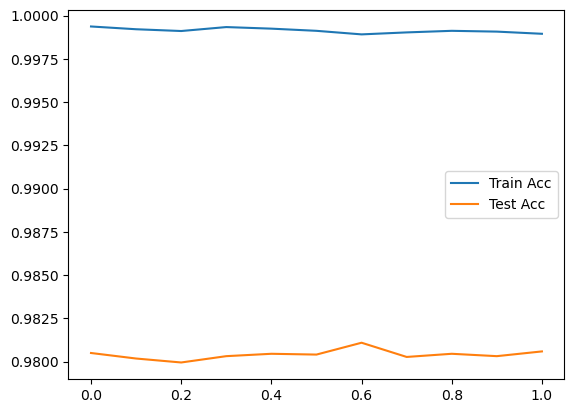

Train Acc: [0.9993718162505425, 0.9992119149324988, 0.9991091212280421, 0.9993375516823902, 0.999246179500651, 0.9991205427507596, 0.9989149553418462, 0.9990291705690203, 0.9991205427507596, 0.9990748566598899, 0.9989492199099984]
Test Acc: [0.9804951580486022, 0.9801754065412023, 0.9799470126073452, 0.9803124429015165, 0.9804494792618308, 0.9804038004750594, 0.9810889822766308, 0.9802667641147451, 0.9804494792618308, 0.9803124429015165, 0.980586515622145]


In [46]:
reg_lambda = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
train_acc = []
test_acc = []

for rate in reg_lambda:
    model = XGBClassifier(reg_lambda=rate, tree_method='gpu_hist', gpu_id=0, objective = 'multi:softmax', n_jobs = -1)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    print('Parameter', rate, 'Completed')

plt.plot(reg_lambda, train_acc, label='Train Acc')
plt.plot(reg_lambda, test_acc, label = 'Test Acc')
plt.legend()
plt.show()
print('Train Acc:', train_acc)
print('Test Acc:', test_acc)

Parameter 0 Completed
Parameter 0.1 Completed
Parameter 0.2 Completed
Parameter 0.3 Completed
Parameter 0.4 Completed
Parameter 0.5 Completed
Parameter 0.6 Completed
Parameter 0.7 Completed
Parameter 0.8 Completed
Parameter 0.9 Completed
Parameter 1 Completed


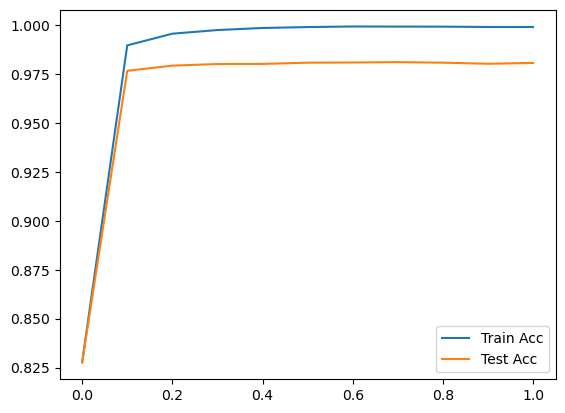

Train Acc: [0.8277291728533248, 0.9895493067135711, 0.9955341846174932, 0.9973844712977135, 0.9984466729104324, 0.9989149553418462, 0.9992119149324988, 0.9991548073189117, 0.9991205427507596, 0.9989606414327158, 0.9989492199099984]
Test Acc: [0.8276082587246483, 0.9765667823862598, 0.9792161520190024, 0.980038370180888, 0.9800840489676594, 0.9807235519824593, 0.9808149095560021, 0.9809976247030879, 0.9807235519824593, 0.9801754065412023, 0.980586515622145]


In [47]:
subsample = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
train_acc = []
test_acc = []

for rate in subsample:
    model = XGBClassifier(subsample=rate, tree_method='gpu_hist', gpu_id=0, objective = 'multi:softmax', n_jobs = -1)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    print('Parameter', rate, 'Completed')

plt.plot(subsample, train_acc, label='Train Acc')
plt.plot(subsample, test_acc, label = 'Test Acc')
plt.legend()
plt.show()
print('Train Acc:', train_acc)
print('Test Acc:', test_acc)

Parameter 0 Completed
Parameter 0.1 Completed
Parameter 0.2 Completed
Parameter 0.3 Completed
Parameter 0.4 Completed
Parameter 0.5 Completed
Parameter 0.6 Completed
Parameter 0.7 Completed
Parameter 0.8 Completed
Parameter 0.9 Completed
Parameter 1 Completed


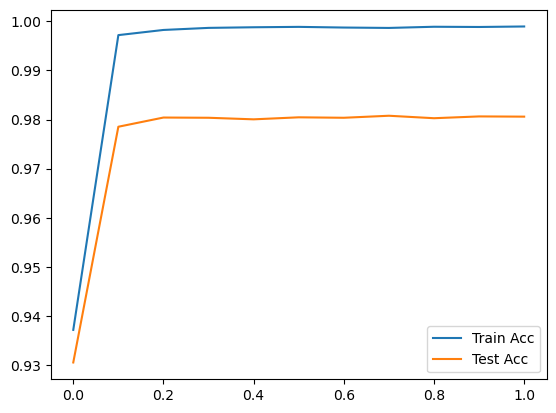

Train Acc: [0.9371587820088174, 0.9971903054115174, 0.998241085501519, 0.9986636818420632, 0.9987893185919546, 0.9988692692509765, 0.9987322109783676, 0.9986522603193457, 0.9988921122964114, 0.9988464262055418, 0.9989492199099984]
Test Acc: [0.9305225653206651, 0.9785309702174311, 0.9804038004750594, 0.980358121688288, 0.980038370180888, 0.9804494792618308, 0.980358121688288, 0.9807692307692307, 0.9802667641147451, 0.9806321944089165, 0.980586515622145]


In [48]:
colsample_bytree = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
train_acc = []
test_acc = []

for rate in colsample_bytree:
    model = XGBClassifier(colsample_bytree=rate, tree_method='gpu_hist', gpu_id=0, objective = 'multi:softmax', n_jobs = -1)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    print('Parameter', rate, 'Completed')

plt.plot(colsample_bytree, train_acc, label='Train Acc')
plt.plot(colsample_bytree, test_acc, label = 'Test Acc')
plt.legend()
plt.show()
print('Train Acc:', train_acc)
print('Test Acc:', test_acc)

In [11]:
model = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, objective = 'multi:softmax', n_jobs = -1, 
                          max_depth=9, 
                          learning_rate =0.5,
                          gamma=0,
                          reg_lambda=0.8,
                          subsample=0.8,
                          colsample_bytree=0.8)
model.fit(X_train, y_train)

expected_y  = y_test
predicted_y = model.predict(X_test)

print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     18118
         1.0       0.95      0.68      0.79       556
         2.0       0.97      0.93      0.95      1448
         3.0       0.87      0.73      0.80       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.95      0.86      0.90     21892
weighted avg       0.98      0.98      0.98     21892



In [ ]:
#Do Not Run
'''
param_grid = {
    "max_depth": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "learning_rate": [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1],
    "reg_lambda": [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1],
    "subsample": [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1],
    "colsample_bytree": [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
}

grid_cv = GridSearchCV(model, param_grid, n_jobs = 4, verbose = 3, return_train_score = True)
_ = grid_cv.fit(X_test, y_test)

print(f'Best Parameters:', grid_cv.best_params_)
print(f'Best Score:', grid_cv.best_score_)
'''